sentiment analysis  on movie review
Classify IMDB reviews as positive or negative

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving IMDB Dataset.csv to IMDB Dataset.csv


In [ ]:
uploaded.keys()
df = pd.read_csv('IMDB Dataset.csv')  # Replace with exact filename from uploaded.keys()
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# 4. Basic Info
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSentiment Counts:\n", df['sentiment'].value_counts())

(50000, 2)


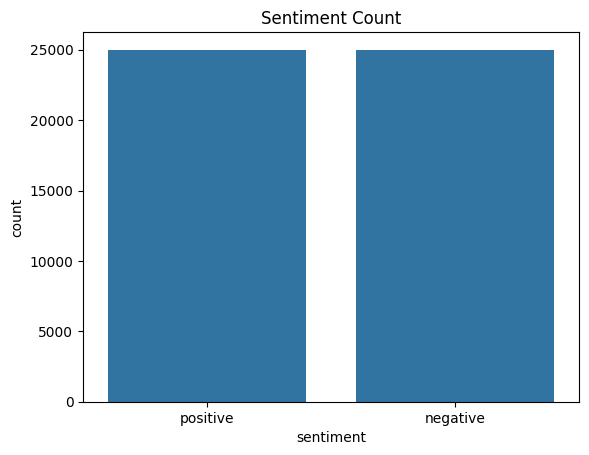

In [ ]:

# 5. Visualization - Countplot
sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution')
plt.show()

# 6. Download NLTK Resources
nltk.download('stopwords')
stop_words = stopwords.words('english')

In [ ]:

# 7. Clean Text Function
def clean_text(text):
    text = re.sub(r"<.*?>", "", text)  # Remove HTML
    text = re.sub(r"[^a-zA-Z]", " ", text)  # Keep letters
    text = text.lower().split()
    text = [word for word in text if word not in stop_words]
    return " ".join(text)

# 8. Apply Cleaning
df['clean_review'] = df['review'].apply(clean_text)

In [67]:
# Step 6: Data Preprocessing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')  # ✅ THIS LINE defines stop_words

def clean_text(text):
    text = re.sub(r"<.*?>", "", text)  # remove HTML tags
    text = re.sub(r"[^a-zA-Z]", " ", text)  # keep only letters
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stop_words]
    return " ".join(text)

df['clean_review'] = df['review'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


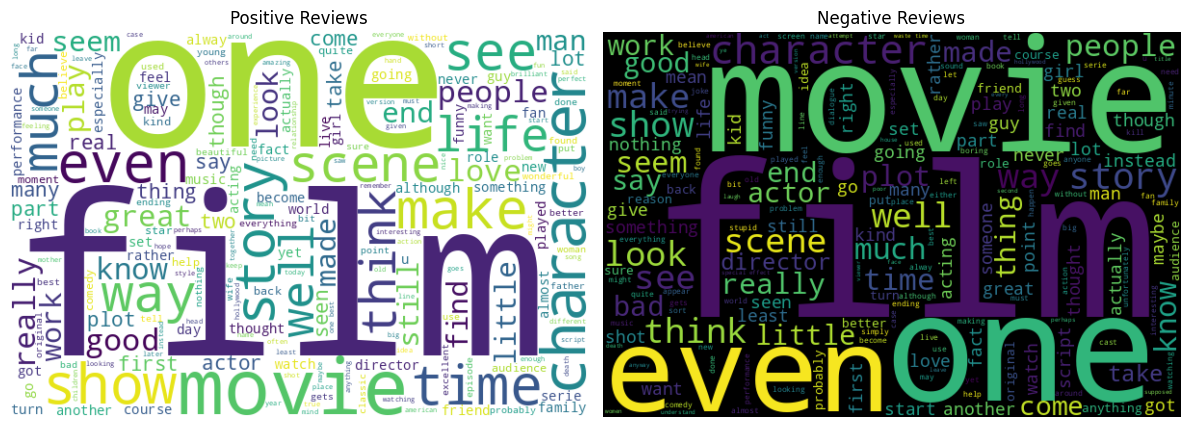

In [ ]:
# 5. Word Clouds
pos_text = ' '.join(df[df['sentiment'] == 'positive']['clean_review'])
neg_text = ' '.join(df[df['sentiment'] == 'negative']['clean_review'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=600, height=400, background_color='white').generate(pos_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')

plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=600, height=400, background_color='black').generate(neg_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')

plt.tight_layout()
plt.show()


In [ ]:
# 6. Encode sentiment to numerical
from sklearn.model_selection import train_test_split

df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Drop any rows where 'clean_review' or 'sentiment' is missing
df = df.dropna(subset=['clean_review', 'sentiment'])

# Reset index after dropping
df.reset_index(drop=True, inplace=True)


In [76]:


# 10. Encode Target
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df.dropna(subset=['clean_review', 'sentiment'], inplace=True)
df.reset_index(drop=True, inplace=True)

# 11. Train-Test Split
X = df['clean_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 12. TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 13. Train Model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# 14. Evaluate
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8915

Confusion Matrix:
 [[4349  612]
 [ 473 4566]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [77]:
import joblib

# Save model and vectorizer
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [81]:
from google.colab import files
files.download('sentiment_model.pkl')
files.download('tfidf_vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>